In [1]:
import matplotlib.pyplot as plt
import torch
from torch.optim import RMSprop

/Users/juangarcia/anaconda3/envs/ada/lib/python3.9/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'dlopen(/Users/juangarcia/anaconda3/envs/ada/lib/python3.9/site-packages/torchvision/image.so, 6): Symbol not found: __ZN3c1017RegisterOperatorsD1Ev
  Referenced from: /Users/juangarcia/anaconda3/envs/ada/lib/python3.9/site-packages/torchvision/image.so
  Expected in: /Users/juangarcia/anaconda3/envs/ada/lib/python3.9/site-packages/torch/lib/libtorch_cpu.dylib
 in /Users/juangarcia/anaconda3/envs/ada/lib/python3.9/site-packages/torchvision/image.so'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(
/Users/juangarcia/anaconda3/envs/ada/lib/python3.9/site-packages/transformers/utils/generic.py:441: UserWarning: torch.utils._pytree._register

In [2]:
model = torch.nn.Linear(1, 1)
optimizer = RMSprop(model.parameters(), lr=0.1, momentum=0.9, weight_decay=1e-5)

### FixLR

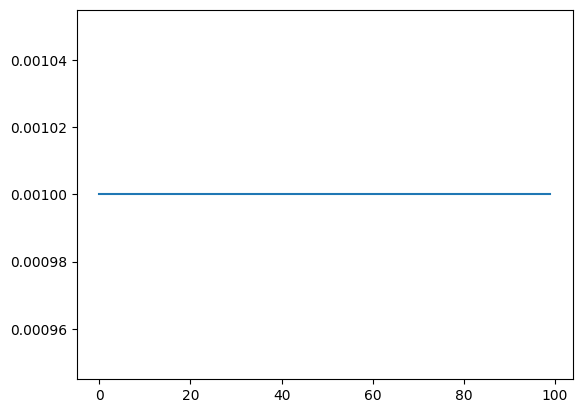

In [11]:
scheduler = torch.optim.lr_scheduler.LambdaLR(optimizer, lr_lambda=lambda _: 1)

lrs = []
for i in range(100):
    optimizer.step()
    lrs.append(optimizer.param_groups[0]["lr"])
    scheduler.step()

plt.plot(lrs)

### LinearLR

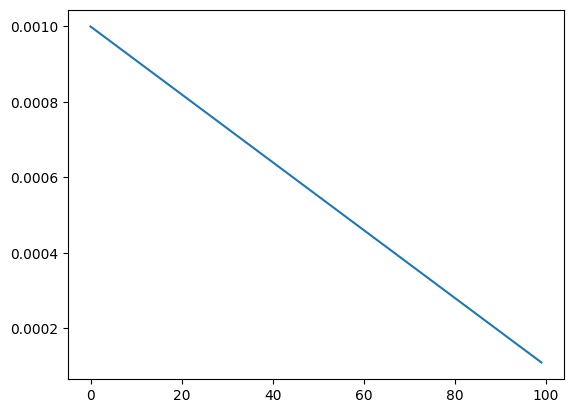

In [13]:
scheduler = torch.optim.lr_scheduler.LinearLR(optimizer, start_factor=1, end_factor=0.1, total_iters=100)

lrs = []
for i in range(100):
    optimizer.step()
    lrs.append(optimizer.param_groups[0]["lr"])
    scheduler.step()

plt.plot(lrs)

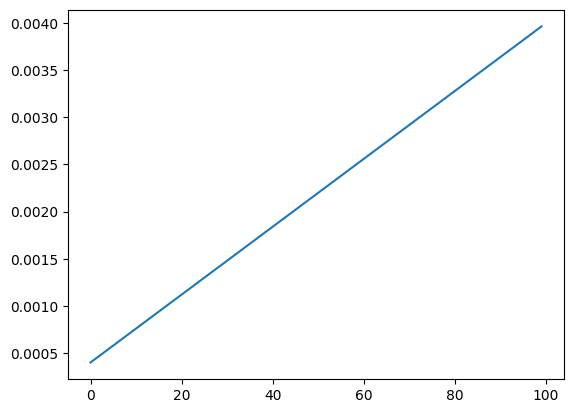

In [5]:
scheduler = torch.optim.lr_scheduler.LinearLR(optimizer, start_factor=0.1, end_factor=1, total_iters=100)

lrs = []
for i in range(100):
    optimizer.step()
    lrs.append(optimizer.param_groups[0]["lr"])
    scheduler.step()

plt.plot(lrs)

### OneCycleLR Scheduler

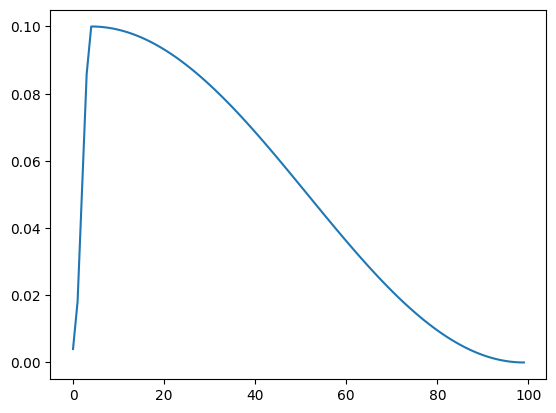

In [8]:
scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr=0.1, pct_start=0.05, steps_per_epoch=10, epochs=10)
lrs = []

for i in range(100):
    optimizer.step()
    lrs.append(optimizer.param_groups[0]["lr"])
    scheduler.step()

plt.plot(lrs)

### CyclicLR - triangular

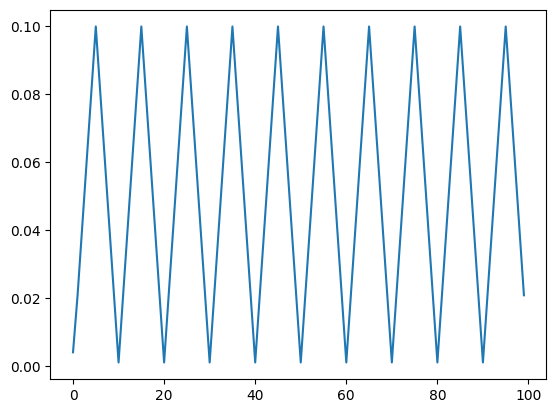

In [9]:
scheduler = torch.optim.lr_scheduler.CyclicLR(optimizer, base_lr=0.001, max_lr=0.1, step_size_up=5, mode="triangular")

lrs = []
for i in range(100):
    optimizer.step()
    lrs.append(optimizer.param_groups[0]["lr"])
    scheduler.step()

plt.plot(lrs)

### CyclicLR - triangular2

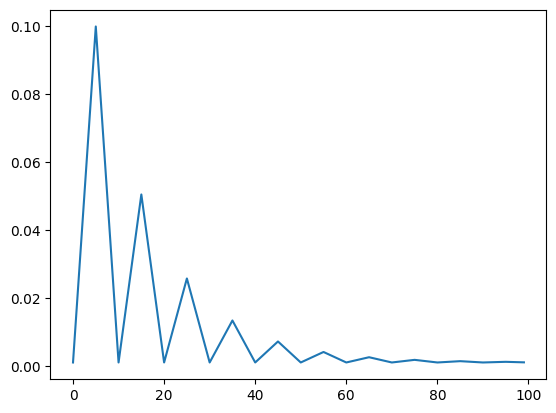

In [10]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
scheduler = torch.optim.lr_scheduler.CyclicLR(optimizer, base_lr=0.001, max_lr=0.1, step_size_up=5, mode="triangular2")

lrs = []
for i in range(100):
    optimizer.step()
    lrs.append(optimizer.param_groups[0]["lr"])
    scheduler.step()

plt.plot(lrs)